In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines, markers

In [115]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (14, 5)

In [3]:
import seaborn as sb

In [4]:
import pickle
import numpy as np
import pandas as pd

In [94]:
results = pd.DataFrame()

In [116]:
results['Random Agent'] = pickle.load(open('random_colorful.pkl', 'rb'))
results['Explosive Agent'] = pickle.load(open('./results/simple_always_explode.pkl', 'rb'))
results['Red Agent'] = pickle.load(open('./results/simple_red_03.pkl', 'rb'))
results['Green Agent'] = pickle.load(open('./results/simple_green_03.pkl', 'rb'))
results['Blue Agent'] = pickle.load(open('./results/simple_blue_03_v2.pkl', 'rb'))
results['Yellow Agent'] = pickle.load(open('./results/simple_yellow_03.pkl', 'rb'))
results['Purple Agent'] = pickle.load(open('./results/simple_purple_03.pkl', 'rb'))
results['Expensive Agent'] = pickle.load(open('./results/simple_all_colors.pkl', 'rb'))
results['DQN Agent'] = pickle.load(open('./results/dqn_last_final.pkl', 'rb'))
results['DDQN Agent'] = pickle.load(open('./results/ddqn_last_final.pkl', 'rb'))

In [107]:
results

,Random Agent,Explosive Agent,Red Agent,Green Agent,Blue Agent,Yellow Agent,Purple Agent,Expensive Agent,DQN Agent,DDQN Agent
0,1,19,27,30,31,29,41,30,38,37
1,1,19,16,14,14,20,43,22,43,23
2,0,20,30,41,42,47,38,31,62,48
3,0,18,33,23,24,45,40,27,31,37
4,2,19,28,30,30,28,32,40,46,46
...,...,...,...,...,...,...,...,...,...,...
995,0,19,33,38,28,29,30,26,42,45
996,1,19,30,29,30,24,36,32,41,26
997,0,19,23,24,24,28,27,24,36,49
998,2,18,30,37,38,35,32,26,57,49


[Text(0, 0.5, 'VP')]

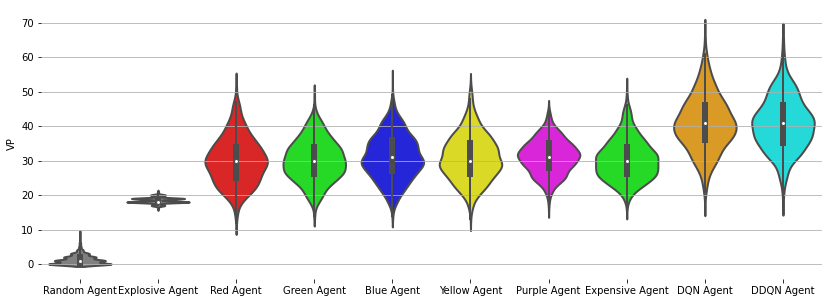

In [117]:
ax = sb.violinplot(data=results, 
                   palette=['gray', 'gray', 'red', 'lime', 'blue', 'yellow', 'magenta', 'lime', 'orange', 'cyan'],
                   scale='width',
                   inner='box',
                   orient='v',
                   saturation=0.7,
                   linewidth=2,
                   sharey=True
                  )
ax.set(ylabel='VP')

In [118]:
ax.get_figure().savefig('quacks_result_final.png', dpi=300)


In [94]:
for game in results.iterrows():
    print(pd.max(game))

AttributeError: module 'pandas' has no attribute 'max'

In [31]:
results.idxmax()

Random Agent         6
Explosive Agent    190
Red Agent          273
Green Agent         65
Blue Agent          65
Yellow Agent        92
Purple Agent       517
Expensive Agent    965
DQN Agent          651
DDQN Agent         881
dtype: int64

In [50]:
results[['DQN Agent']].mean()

DQN Agent    40.871
dtype: float64

In [51]:
results[['DDQN Agent']].mean()

DDQN Agent    40.743
dtype: float64

In [49]:
results[['DQN Agent', 'DDQN Agent']].idxmax(axis=1).value_counts() / results.shape[0]

DQN Agent     0.546
DDQN Agent    0.454
dtype: float64

In [38]:
results[['DQN Agent', 'Red Agent', 'Green Agent', 'Blue Agent', 'Yellow Agent', 'Purple Agent', 'Expensive Agent']].idxmax(axis=1).value_counts() / results.shape[0]

DQN Agent          0.723
Blue Agent         0.065
Yellow Agent       0.062
Red Agent          0.054
Purple Agent       0.047
Expensive Agent    0.036
Green Agent        0.013
dtype: float64

In [39]:
results[['DDQN Agent', 'Red Agent', 'Green Agent', 'Blue Agent', 'Yellow Agent', 'Purple Agent', 'Expensive Agent']].idxmax(axis=1).value_counts() / results.shape[0]

DDQN Agent         0.717
Yellow Agent       0.061
Expensive Agent    0.059
Blue Agent         0.052
Red Agent          0.052
Purple Agent       0.044
Green Agent        0.015
dtype: float64

In [9]:
returns = {
    'DQN' : pickle.load(open('results/dqn_colorful_returns_last_final_final.pkl', 'rb')),
    'DDQN' : pickle.load(open('results/ddqn_colorful_returns_last_final.pkl', 'rb'))
}

In [39]:
import numpy as np
heuristic_means = [results[['Red Agent']].mean()[0], results[['Green Agent']].mean()[0], 
                   results[['Blue Agent']].mean()[0], results[['Yellow Agent']].mean()[0], 
                   results[['Purple Agent']].mean()[0], results[['Expensive Agent']].mean()[0]]
np.mean(heuristic_means)

30.629833333333334

In [68]:
results[['DQN Agent']]

,DQN Agent
0,38
1,43
2,62
3,31
4,46
...,...
995,42
996,41
997,36
998,57


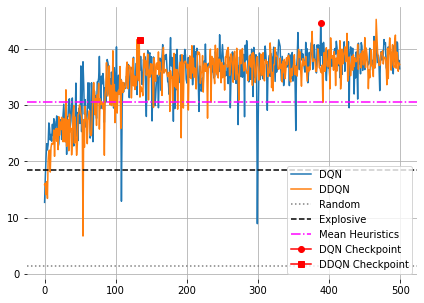

In [112]:
fig = pd.DataFrame(returns).plot()
fig.axhline(y=results[['Random Agent']].mean()[0], color='gray', linestyle=':', label='Random')
fig.axhline(y=results[['Explosive Agent']].mean()[0], color='black', linestyle='--', label='Explosive')
#fig.axhline(y=results[['Expensive Agent']].mean()[0], color='magenta', linestyle='-.', label='Expensive Agent')
fig.axhline(y=np.mean(heuristic_means), color='magenta', linestyle='-.', label='Mean Heuristics')
fig.plot(389, returns['DQN'][388], color='red', marker='o', label='DQN Checkpoint')
fig.plot(134, returns['DDQN'][133], color='red', marker='s', label='DDQN Checkpoint')

fig.legend()

In [114]:
fig.get_figure().savefig('quacks_returns_final.png', dpi=300)
